# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import os
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from scipy.stats import linregress
from pprint import pprint
from citipy import citipy
from api_keys import weather_api_key
from api_keys import g_key
from datetime import date

## Generate Cities List

In [2]:
# creating cities list
cities = []

#Generating random latitudes and longitudes
latitude = np.random.uniform(low=-90.000, high=90.000, size=1500)
longitude = np.random.uniform(low=-180.000, high=180.000, size=1500)

#Creating for loop to find cities from citipy using the randomly generated lat-long
for x in range(len(latitude)):
    city = citipy.nearest_city(latitude[x], longitude[x])
       
   #getting city names and country from citipy
    city_name = city.city_name + "," + city.country_code
    
    #Adding city names to the empty list
    cities.append(city_name)
    
#filtering out only the unique cities name from the list
unique_cities = set(cities)
len(unique_cities)
cities

['waingapu,id',
 'ancud,cl',
 'mataura,pf',
 'khatanga,ru',
 'amurrio,es',
 'hewitt,us',
 'punta arenas,cl',
 'faanui,pf',
 'illoqqortoormiut,gl',
 'cherskiy,ru',
 'punta arenas,cl',
 'yellowknife,ca',
 'albany,au',
 'mataura,pf',
 'punta arenas,cl',
 'ponta do sol,pt',
 'barrow,us',
 'mataura,pf',
 'kollam,in',
 'atuona,pf',
 'kapaa,us',
 'half moon bay,us',
 'maceio,br',
 'forestville,ca',
 'zhigansk,ru',
 'bluff,nz',
 'bluff,nz',
 'rundu,na',
 'karratha,au',
 'esperance,au',
 'saskylakh,ru',
 'isangel,vu',
 'whitehorse,ca',
 'mar del plata,ar',
 'mar del plata,ar',
 'kaitangata,nz',
 'bethel,us',
 'urumqi,cn',
 'faanui,pf',
 'eyl,so',
 'brae,gb',
 'bethel,us',
 'ribeira grande,pt',
 'bugiri,ug',
 'tautira,pf',
 'busselton,au',
 'kirakira,sb',
 'albany,au',
 'hithadhoo,mv',
 'severo-kurilsk,ru',
 'emerald,au',
 'saint anthony,ca',
 'ushuaia,ar',
 'chokurdakh,ru',
 'punta arenas,cl',
 'barbosa ferraz,br',
 'albany,au',
 'broome,au',
 'los llanos de aridane,es',
 'hobart,au',
 'mahebou

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
base_url = "https://api.openweathermap.org/data/2.5/weather?"

#Creating an empty list for each of the parameters
city_temperature = []
city_cloudiness = []
city_humidity = []
city_windspeed = []
city_latitudes = []
city_longitudes=[]
city_name_list = []
city_date=[]
city_country=[]
city_two=[]

# set initial count quantities for organization
count_one = 0
set_one = 1

#converting Temperature from Kelvin to Farenheit
units = "imperial"

#Creating a for loop to get data from openweathermap for each city in the city list
for city in unique_cities:
    
    #Creating specific url for each city using the api_key
    target_url = base_url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
    try:
        #Converting the weather data to a json file
        city_data = requests.get(target_url).json()
        
        if ( city_data["main"] and  city_data["clouds"] and city_data["wind"] and city_data["coord"]):
            
            #Retrieve name of each city
            city_name = city_data["name"]
            city_name_list.append(city_name)
        
            #retriving temperature for each city from the weather data and adding it to the empty list    
            city_temp = city_data["main"]["temp_max"]
            city_temperature.append(city_temp)

            #retriving cloudiness for each city from the weather data and adding it to the empty list  
            city_cloud = city_data["clouds"]["all"]
            city_cloudiness.append(city_cloud)

            #retriving humidity for each city from the weather data and adding it to the empty list  
            city_humi = city_data["main"]["humidity"]
            city_humidity.append(city_humi)

            #retriving wind speed for each city from the weather data and adding it to the empty list 
            #Converting wind speed to mph
            city_sp = round((city_data["wind"]["speed"])/ 0.44704,2)
            city_windspeed.append(city_sp)

            #retriving latitudes for each city from the weather data
            city_lat = city_data["coord"]["lat"]
            city_latitudes.append(city_lat)
            
            #retriving longitudes for each city from the weather data
            city_lng = city_data["coord"]["lon"]
            city_longitudes.append(city_lng)
            
            #retriving date for each city from the weather data
            city_dt = city_data["dt"]
            city_date.append(city_dt)
            
            #retriving country for each city from the weather data
            city_cntry = city_data["sys"]["country"]
            city_country.append(city_cntry)
            
            if count_one >= 50:
                count_one = 1
                set_one += 1
                city_two.append(city)
            else:
                count_one = count_one + 1
                city_two.append(city)
            print(f"Processing Record {count_one} of Set {set_one} | {city}")
            
            
            
    except Exception:
        print("City not found. Skipping...")
print("\nData Retrieval Complete\n")

    

Processing Record 1 of Set 1 | libenge,cd
Processing Record 2 of Set 1 | nemuro,jp
Processing Record 3 of Set 1 | genhe,cn
Processing Record 4 of Set 1 | lipin bor,ru
Processing Record 5 of Set 1 | deputatskiy,ru
Processing Record 6 of Set 1 | henties bay,na
Processing Record 7 of Set 1 | gushikawa,jp
Processing Record 8 of Set 1 | brigantine,us
Processing Record 9 of Set 1 | anadyr,ru
Processing Record 10 of Set 1 | dibulla,co
Processing Record 11 of Set 1 | porto belo,br
Processing Record 12 of Set 1 | avarua,ck
Processing Record 13 of Set 1 | chibombo,zm
Processing Record 14 of Set 1 | joaima,br
Processing Record 15 of Set 1 | gorontalo,id
Processing Record 16 of Set 1 | sibu,my
Processing Record 17 of Set 1 | lagos,pt
Processing Record 18 of Set 1 | forestville,ca
Processing Record 19 of Set 1 | smoky lake,ca
Processing Record 20 of Set 1 | madurai,in
City not found. Skipping...
City not found. Skipping...
Processing Record 21 of Set 1 | cidreira,br
Processing Record 22 of Set 1 | 

Processing Record 27 of Set 4 | pitimbu,br
Processing Record 28 of Set 4 | yuksekova,tr
Processing Record 29 of Set 4 | talnakh,ru
Processing Record 30 of Set 4 | ribeira grande,pt
City not found. Skipping...
City not found. Skipping...
Processing Record 31 of Set 4 | antofagasta,cl
Processing Record 32 of Set 4 | birjand,ir
Processing Record 33 of Set 4 | zhuhai,cn
Processing Record 34 of Set 4 | chongqing,cn
Processing Record 35 of Set 4 | turan,ru
Processing Record 36 of Set 4 | kollam,in
Processing Record 37 of Set 4 | ericeira,pt
Processing Record 38 of Set 4 | soe,id
Processing Record 39 of Set 4 | walvis bay,na
Processing Record 40 of Set 4 | rikitea,pf
Processing Record 41 of Set 4 | vaini,to
Processing Record 42 of Set 4 | gulu,ug
Processing Record 43 of Set 4 | lienz,at
Processing Record 44 of Set 4 | saint george,bm
Processing Record 45 of Set 4 | acapulco,mx
City not found. Skipping...
Processing Record 46 of Set 4 | calama,cl
Processing Record 47 of Set 4 | diffa,ne
Proces

City not found. Skipping...
Processing Record 45 of Set 7 | pevek,ru
City not found. Skipping...
Processing Record 46 of Set 7 | hilo,us
Processing Record 47 of Set 7 | hay river,ca
Processing Record 48 of Set 7 | palembang,id
Processing Record 49 of Set 7 | kafanchan,ng
Processing Record 50 of Set 7 | yar-sale,ru
Processing Record 1 of Set 8 | mar del plata,ar
Processing Record 2 of Set 8 | okhotsk,ru
Processing Record 3 of Set 8 | san jose,bo
City not found. Skipping...
Processing Record 4 of Set 8 | corning,us
Processing Record 5 of Set 8 | georgetown,sh
Processing Record 6 of Set 8 | launceston,au
Processing Record 7 of Set 8 | moerai,pf
Processing Record 8 of Set 8 | lalmohan,bd
Processing Record 9 of Set 8 | maceio,br
Processing Record 10 of Set 8 | aguas vermelhas,br
Processing Record 11 of Set 8 | faanui,pf
Processing Record 12 of Set 8 | hobyo,so
Processing Record 13 of Set 8 | souillac,mu
Processing Record 14 of Set 8 | nouadhibou,mr
Processing Record 15 of Set 8 | plon,de
Pr

Processing Record 14 of Set 11 | kirakira,sb
Processing Record 15 of Set 11 | bluff,nz
Processing Record 16 of Set 11 | blonie,pl
Processing Record 17 of Set 11 | celestun,mx
Processing Record 18 of Set 11 | bugiri,ug
Processing Record 19 of Set 11 | starotimoshkino,ru
City not found. Skipping...
Processing Record 20 of Set 11 | port lincoln,au
Processing Record 21 of Set 11 | vila franca do campo,pt
Processing Record 22 of Set 11 | oistins,bb
Processing Record 23 of Set 11 | piterka,ru
Processing Record 24 of Set 11 | kangaatsiaq,gl
Processing Record 25 of Set 11 | maragondon,ph
Processing Record 26 of Set 11 | bambous virieux,mu
City not found. Skipping...
Processing Record 27 of Set 11 | teknaf,bd
Processing Record 28 of Set 11 | ngunguru,nz
Processing Record 29 of Set 11 | santiago de cao,pe
Processing Record 30 of Set 11 | inta,ru
Processing Record 31 of Set 11 | dzhubga,ru

Data Retrieval Complete



In [8]:
pprint(city_data)

{'base': 'stations',
 'clouds': {'all': 6},
 'cod': 200,
 'coord': {'lat': 44.32, 'lon': 38.7},
 'dt': 1600651164,
 'id': 563601,
 'main': {'feels_like': 51.84,
          'grnd_level': 1018,
          'humidity': 54,
          'pressure': 1018,
          'sea_level': 1018,
          'temp': 61.79,
          'temp_max': 61.79,
          'temp_min': 61.79},
 'name': 'Dzhubga',
 'sys': {'country': 'RU', 'sunrise': 1600657882, 'sunset': 1600701906},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 41, 'speed': 15.59}}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
summary_data = pd.DataFrame({"City": city_name_list,
                             "Latitude": city_latitudes,
                             "Longitudes":city_longitudes,
                             "Max Temp (F)": city_temperature, 
                             "Humidity (%)": city_humidity,
                             "Cloudiness (%)": city_cloudiness,
                             "Wind Speed (mph)": city_windspeed,                       
                             "Country":city_country,
                             "Date":city_date
                             })
summary_data.head()

# Save Data to csv
summary_data.to_csv("Cities_weather_data.csv", encoding="utf-8", index=False)

len(summary_data)
summary_data.head()

,City,Latitude,Longitudes,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,Libenge,3.65,18.63,70.54,92,100,5.91,CD,1600651060
1,Nemuro,43.32,145.57,64.40,88,75,7.52,JP,1600651060
2,Genhe,50.78,121.52,46.96,76,100,6.96,CN,1600651060
3,Lipin Bor,60.26,37.98,48.22,89,100,47.18,RU,1600651061
4,Deputatsky,69.30,139.90,45.77,62,0,2.46,RU,1600651022


In [11]:
summary_data.columns

Index(['City', 'Latitude', 'Longitudes', 'Max Temp (F)', 'Humidity (%)',
       'Cloudiness (%)', 'Wind Speed (mph)', 'Country', 'Date'],
      dtype='object')

In [13]:
summary_data.describe()

,Latitude,Longitudes,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
count,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,5.310000e+02
mean,18.222335,14.035292,64.082015,71.427495,51.580038,18.583070,1.600651e+09
std,34.368108,91.393281,15.962189,18.431411,40.927302,12.872751,7.418102e+01
min,-54.800000,-179.170000,17.800000,13.000000,0.000000,1.340000,1.600651e+09
25%,-10.310000,-63.940000,51.115000,63.000000,2.500000,8.370000,1.600651e+09
50%,20.930000,18.420000,64.440000,74.000000,57.000000,15.500000,1.600651e+09
75%,49.740000,94.620000,78.570000,86.000000,94.500000,25.010000,1.600651e+09
max,78.220000,178.420000,102.200000,100.000000,100.000000,79.660000,1.600651e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
summary_data[summary_data["Humidity (%)"]>100]

,City,Latitude,Longitudes,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date


In [ ]:
#  Get the indices of cities that have humidity over 100%.
# There are no cities with humidity >100

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

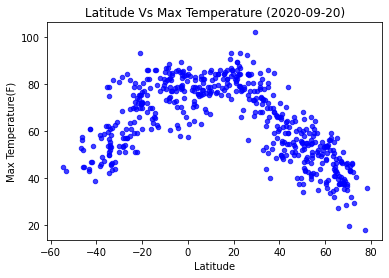

In [17]:
plt.scatter(summary_data["Latitude"],summary_data["Max Temp (F)"], marker="o", facecolors="blue",
            s=20, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.title(f"Latitude Vs Max Temperature ({date.today()})")
plt.savefig('Lat Vs Max Temp.png')
plt.show()

## Latitude vs. Humidity Plot

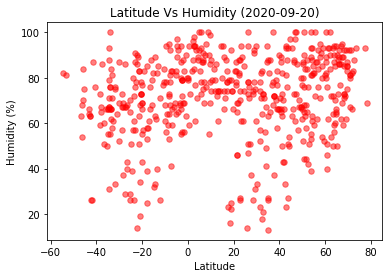

In [18]:

plt.scatter(summary_data["Latitude"],summary_data["Humidity (%)"], marker="o", facecolors="red",
            s=30, alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Latitude Vs Humidity ({date.today()})")
plt.savefig('Lat Vs Humid.png')
plt.show()

## Latitude vs. Cloudiness Plot

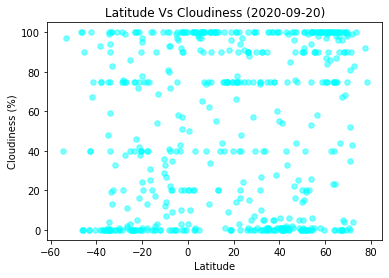

In [19]:
plt.scatter(summary_data["Latitude"],summary_data["Cloudiness (%)"], marker="o", facecolors="aqua",
            s=30, alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Latitude Vs Cloudiness ({date.today()})")
plt.savefig('Lat Vs Cloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

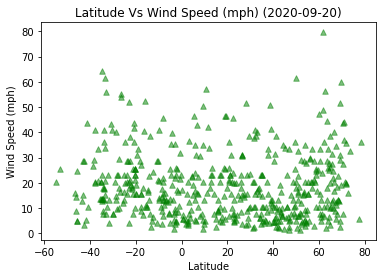

In [20]:
plt.scatter(summary_data["Latitude"],summary_data["Wind Speed (mph)"], marker="^", facecolors="green",
            s=30, alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Latitude Vs Wind Speed (mph) ({date.today()})")
plt.savefig('Lat Vs WindSpeed(mph).png')
plt.show()

## Linear Regression

In [32]:
northern = summary_data.loc[summary_data["Latitude"] >= 0.0]
northern.reset_index(inplace=True)
northern

,index,City,Latitude,Longitudes,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,0,Libenge,3.65,18.63,70.54,92,100,5.91,CD,1600651060
1,1,Nemuro,43.32,145.57,64.40,88,75,7.52,JP,1600651060
2,2,Genhe,50.78,121.52,46.96,76,100,6.96,CN,1600651060
3,3,Lipin Bor,60.26,37.98,48.22,89,100,47.18,RU,1600651061
4,4,Deputatsky,69.30,139.90,45.77,62,0,2.46,RU,1600651022
...,...,...,...,...,...,...,...,...,...,...
341,523,Kangaatsiaq,68.31,-53.46,35.29,85,100,22.66,GL,1600651163
342,524,Maragondon,14.23,120.72,86.00,74,40,7.52,PH,1600651163
343,526,Teknāf,20.86,92.31,81.28,87,100,36.08,BD,1600651163
344,529,Inta,66.03,60.17,37.31,89,98,21.77,RU,1600651164


In [22]:
southern = summary_data.loc[summary_data["Latitude"] < 0.0]
southern.reset_index(inplace=True)
southern

,index,City,Latitude,Longitudes,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,5,Henties Bay,-22.12,14.28,51.01,90,5,19.01,NA,1600651000
1,10,Porto Belo,-27.16,-48.55,60.80,67,75,18.01,BR,1600651018
2,11,Avarua,-21.21,-159.78,78.80,83,100,7.52,CK,1600650847
3,12,Chibombo,-14.66,28.07,65.82,32,0,16.96,ZM,1600651062
4,13,Joaíma,-16.65,-41.03,69.91,66,25,7.20,BR,1600651063
...,...,...,...,...,...,...,...,...,...,...
180,514,Bluff,-46.60,168.33,52.61,63,100,15.90,NZ,1600650986
181,519,Port Lincoln,-34.73,135.87,59.54,55,1,64.29,AU,1600650989
182,525,Bambous Virieux,-20.34,57.76,72.00,73,40,25.52,MU,1600651007
183,527,Ngunguru,-35.62,174.50,62.01,66,0,13.40,NZ,1600651164


In [27]:
# Define plotting function
def plotLinearRegression(xdata,ydata,xlbl,ylbl,xy,figname):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,xy,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.savefig(f"{figname}.png")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8385623774688163


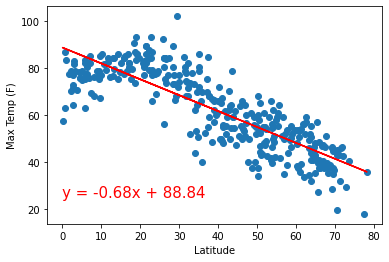

In [33]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
xlbl = "Latitude"
ylbl = "Max Temp (F)"
xy = (0,25)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,xy,"northern_latvsTemp(linear regress)")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7333990390492666


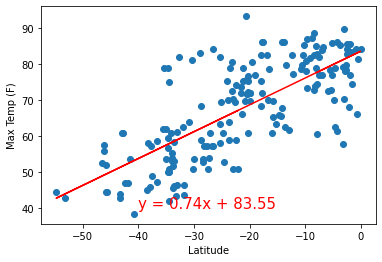

In [35]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
xlbl = "Latitude"
ylbl = "Max Temp (F)"
xy = (-40,40)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,xy,"southern_latvsTemp(linear regress)")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.017493188641251416


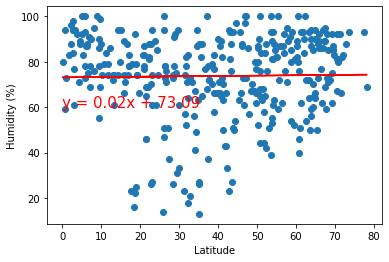

In [37]:
# Northern Hemisphere - Humidity vs. Latitude Linear Regression
xlbl = "Latitude"
ylbl = "Humidity (%)"
xy = (0,60)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,xy,"northern_latvshumidity(linear regress)")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.16358241783789096


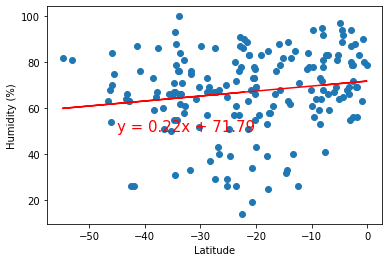

In [41]:
# Southern Hemisphere - Humidity vs. Latitude Linear Regression
xlbl = "Latitude"
ylbl = "Humidity (%)"
xy = (-45,50)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,xy,"southern_latvshumidity(linear regress)")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.011987345191704317


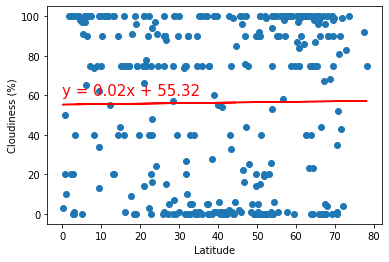

In [42]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
xlbl = "Latitude"
ylbl = "Cloudiness (%)"
xy = (0,60)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,xy,"northern_latvscloudiness(linear regress)")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.16358241783789096


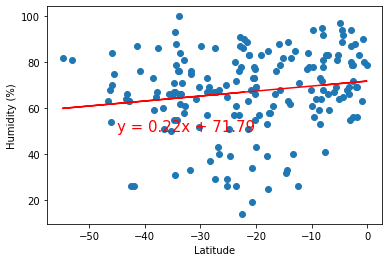

In [44]:
# Northern Hemisphere - Humidity vs. Latitude Linear Regression
xlbl = "Latitude"
ylbl = "Humidity (%)"
xy = (-45,50)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,xy,"southern_latvscloudiness(linear regress)")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
xlbl = "Latitude"
ylbl = "Wind Speed (mph)"
xy = (0,60)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,xy,"northern_latvswindspeed(linear regress)")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
xlbl = "Latitude"
ylbl = "Humidity (%)"
xy = (0,60)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,xy,"northern_latvshumidity(linear regress)")